In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
import mpltern

# Problem 1A

In [5]:
# equilibrium data
y = np.array([0, 0.21, 0.37, 0.51, 0.64, 0.72, 0.79, 0.86, 0.91, 0.96, 0.98, 1.0])
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0])

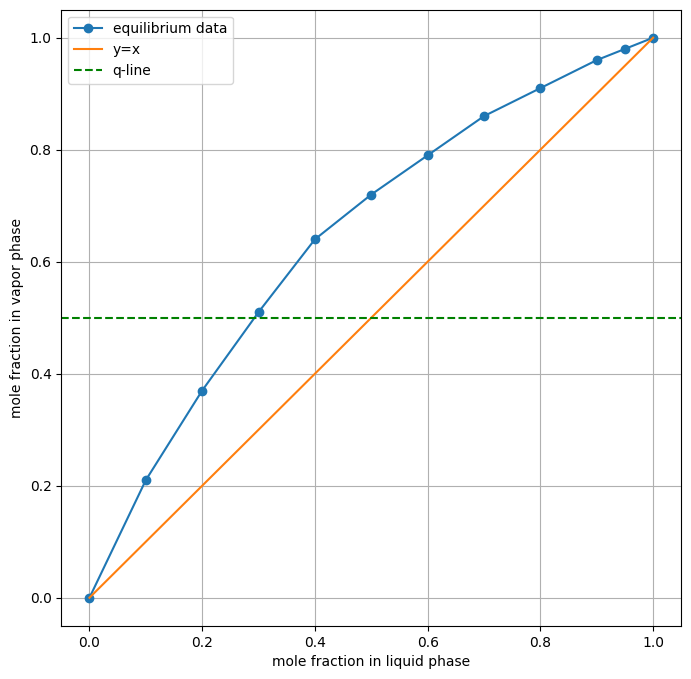

In [6]:
plt.figure(figsize=(8,8))
plt.plot(x, y, label = "equilibrium data", marker = "o")
plt.plot(x, x, label = "y=x")
plt.axhline(y=0.5, color='green', linestyle='--', label='q-line')
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")
plt.legend()
plt.grid(True)

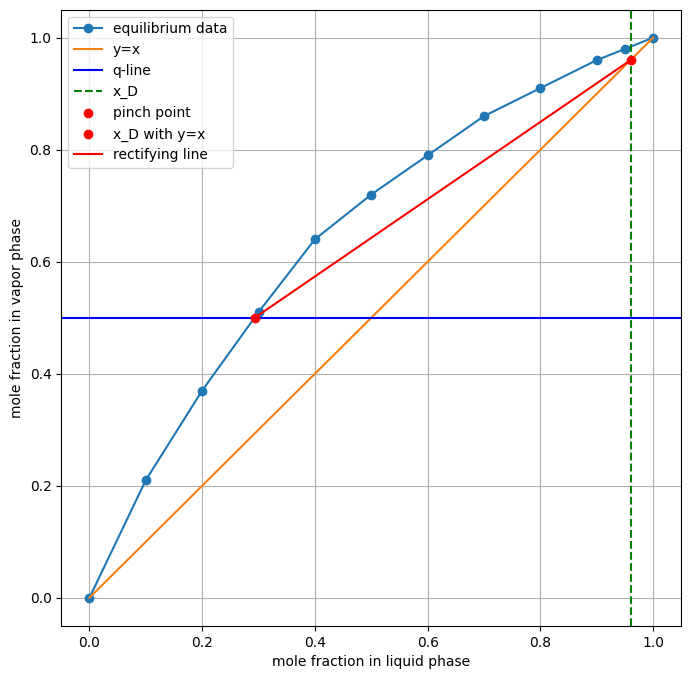

In [7]:
x_D = 0.96
f_x = interp1d(x, y)
x_find = np.linspace(x.min(), x.max(), 1000)
y_find = f_x(x_find)
x_intersection = x_find[np.argmin(np.abs(y_find - 0.5))]

plt.figure(figsize=(8,8))
plt.plot(x, y, label = "equilibrium data", marker = "o")
plt.plot(x, x, label = "y=x")
plt.axhline(y=0.5, color='blue', label='q-line')
plt.axvline(x=0.96, color='green', linestyle='--', label='x_D')
plt.scatter([x_intersection], [0.5], color='red', zorder=5, label="pinch point")
plt.scatter([0.96], [0.96], color='red', zorder=5, label="x_D with y=x")
plt.plot([x_intersection, x_D], [0.5, 0.96], color='red', zorder=5, label="rectifying line")
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")
plt.legend()
plt.grid(True)

In [8]:
rect_slope_min = (0.96 - 0.5) / (x_D - x_intersection)
print("L/V min: ", rect_slope_min)

L/V min:  0.6899585610473845


# Problem 1B

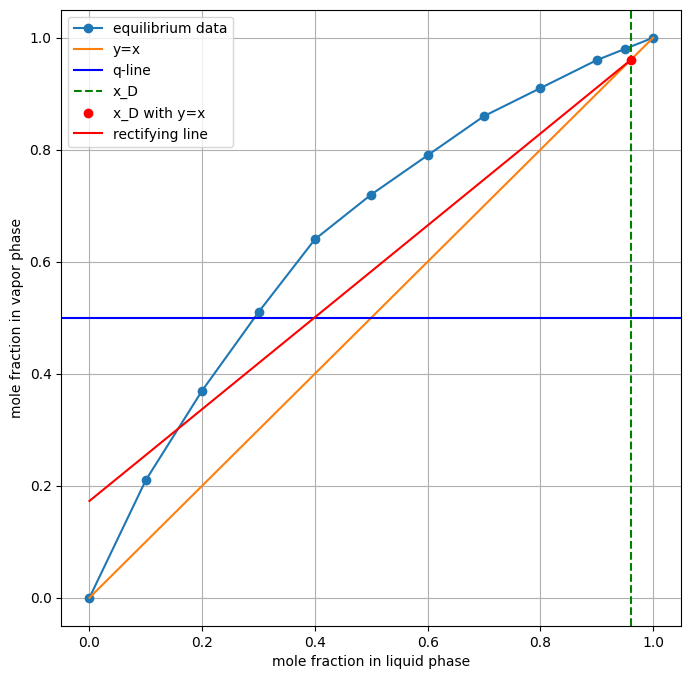

In [9]:
# new rectifying line
x_end, y_end = 0.96, 0.96
slope_1 = 0.82
x_line1 = np.linspace(0, x_end, 100)
y_line1 = y_end - slope_1 * (x_end - x_line1)

plt.figure(figsize=(8,8))
plt.plot(x, y, label = "equilibrium data", marker = "o")
plt.plot(x, x, label = "y=x")
plt.axhline(y=0.5, color='blue', label='q-line')
plt.axvline(x=0.96, color='green', linestyle='--', label='x_D')
plt.scatter([0.96], [0.96], color='red', zorder=5, label="x_D with y=x")
plt.plot(x_line1, y_line1, color='red', zorder=5, label="rectifying line")
plt.xlabel("mole fraction in liquid phase")
plt.ylabel("mole fraction in vapor phase")
plt.legend()
plt.grid(True)

# Problem 2A

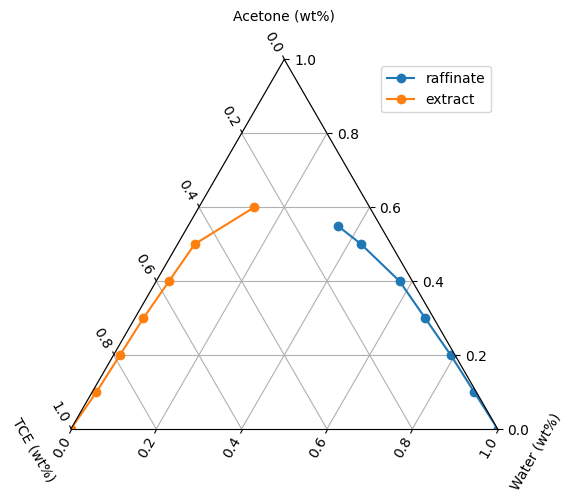

In [10]:
extract = {
    "acetone": [60, 50, 40, 30, 20, 10, 0],
    "water": [13, 4, 3, 2, 1.5, 1, 0],
    "TCE": [27, 46, 57, 68, 78.5, 89, 100]
}

raffinate = {
    "acetone": [55, 50, 40, 30, 20, 10, 0],
    "water": [35, 43, 57, 68, 79, 89.5, 100],
    "TCE": [10, 7, 3, 2, 1, 0.5, 0]
}

fig, ax = plt.subplots(subplot_kw={'projection': 'ternary'})
ax.set_tlabel("Acetone (wt%)") # solute
ax.set_llabel("TCE (wt%)")  # solvent
ax.set_rlabel("Water (wt%)")  # carrier
ax.plot(raffinate['acetone'], raffinate['TCE'], raffinate['water'], label='raffinate', marker='o')
ax.plot(extract['acetone'], extract['TCE'], extract['water'], label='extract', marker='o')
plt.grid()
plt.legend()


# Problem 2B

In [26]:
tie_lines = {
    "extract": [56, 40, 18],
    "raffinate": [44, 29, 12]
}

selectivities = []
for i in range(3):
    x_A_E = tie_lines["extract"][i]
    x_A_R = tie_lines["raffinate"][i] 
    x_C_E = extract["water"][i]
    x_C_R = raffinate["water"][i] 

    K_A_D = x_A_E / x_A_R
    K_C_D = x_C_E / x_C_R

    beta_A_C = 2 * K_A_D / K_C_D

    selectivities.append(beta_A_C)

    print(f"Tie line {i+1}: Relative selectivity = {beta_A_C}")

Tie line 1: Relative selectivity = 6.8531468531468525
Tie line 2: Relative selectivity = 29.655172413793107
Tie line 3: Relative selectivity = 57.0


# Problem 2C

Text(0, 0.5, 'Selectivity factor')

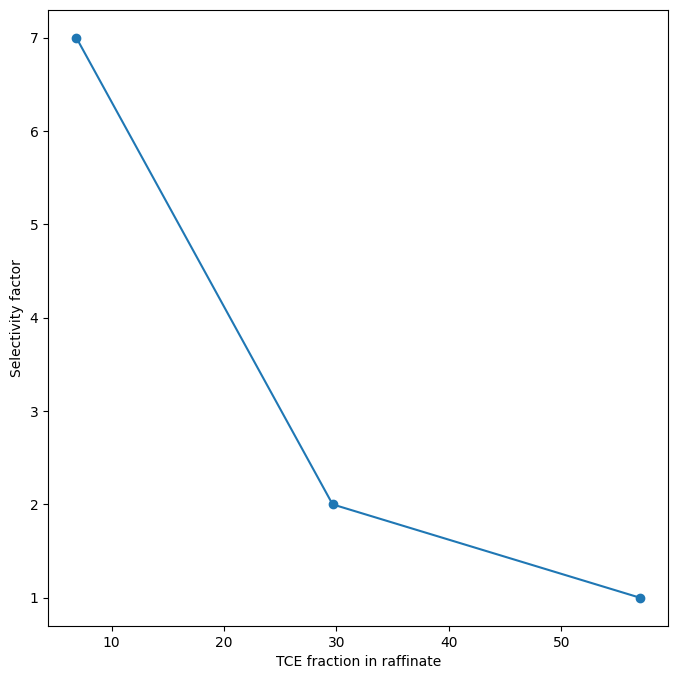

In [24]:
plt.figure(figsize=(8,8))
plt.plot(selectivities, [7, 2, 1], marker='o') # selecting arbitrarily from raffinate phase equilibrium data
plt.xlabel("TCE fraction in raffinate")
plt.ylabel("Selectivity factor")

# Problem 4

Text(0, 0.5, 'acetone fraction in extract')

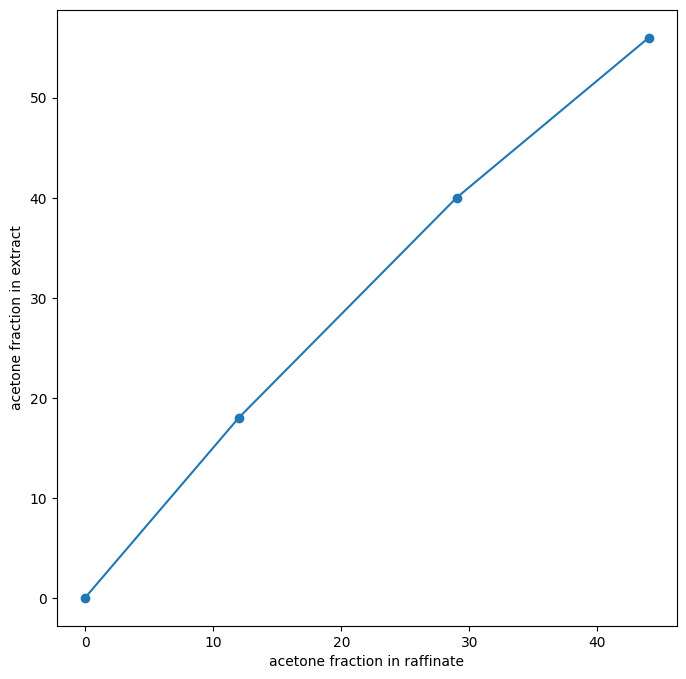

In [31]:
tie_lines = {
    "extract": [56, 40, 18, 0],
    "raffinate": [44, 29, 12, 0]
}

plt.figure(figsize=(8,8))
plt.plot(tie_lines["raffinate"], tie_lines["extract"], marker='o')
plt.xlabel("acetone fraction in raffinate")
plt.ylabel("acetone fraction in extract")

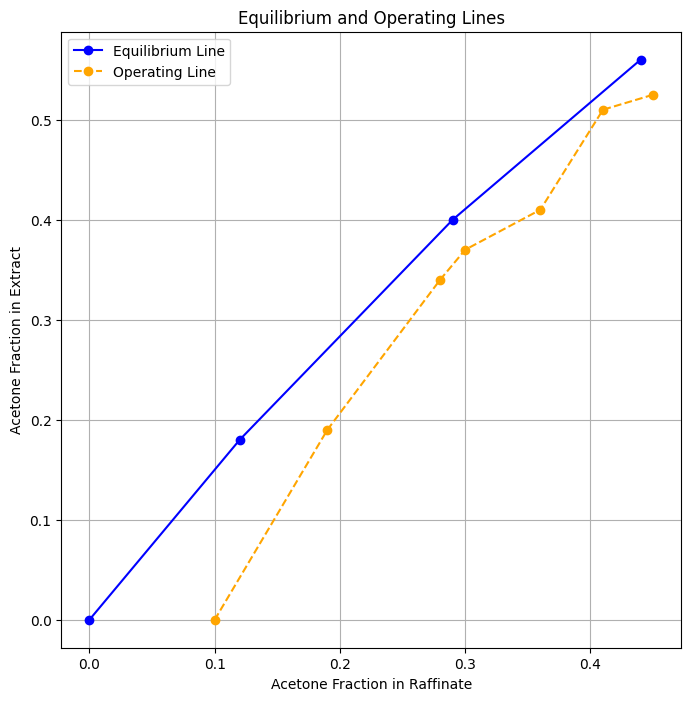

In [40]:
tie_lines = {
    "extract": [.56, .40, .18, 0.0],
    "raffinate": [.44, .29, .12, 0.0]
}

op_x = [0.45, 0.41, 0.36, 0.30, 0.28, 0.19, 0.10]
op_y = [0.525, 0.51, 0.41, 0.37, 0.34, 0.19, 0]


plt.figure(figsize=(8, 8))
plt.plot(tie_lines["raffinate"], tie_lines["extract"], marker='o', linestyle='-', color='blue', label="Equilibrium Line")
plt.plot(op_x, op_y, marker='o', linestyle='--', color='orange', label="Operating Line")
plt.xlabel("Acetone Fraction in Raffinate")
plt.ylabel("Acetone Fraction in Extract")
plt.title("Equilibrium and Operating Lines")
plt.legend()
plt.grid(True)

plt.show()
